In [1]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
list_data_x = []
list_data_dx = []
list_data_dy = []

In [3]:
N_SDR = 8
list_particle_number = []
for i in range(1,N_SDR+1):
    if i < 10:
        list_particle_number.append(("0"+str(i)))
    else:
        list_particle_number.append((str(i)))

In [4]:
#----------------------------
# 2. FLAC model parameters
#----------------------------
num_particles = 600        #number of particles for each SDR
time_steps = 400          #total FLAC model steps
dt_step = 20.*1000 #[yr] FLAC time step for data output
yr_in_Myr = 10.**6 #[yr]

Time_compare = .1 # [Myr]

for i in range(N_SDR):
    particle_number = list_particle_number[i]

    #----------------------------
    # 1. for getting FLAC data
    #----------------------------
    Plate_thickness = "20"     # Hd in the model
    # particle_number = "02"     # which SDR particle
    
    # Get data from FLAC
    #----------------------------
    FLAC_file_path=("/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20180114-SDR-breakthrough/BC450_Hc20-newtonian2")
    #FLAC_file_path=("/Users/Tian/Documents/Thesis"
    #                "/Vts_data/TianHe2/20170920/H"
    #                +Plate_thickness+"-withHealing")

    FLAC_data = open(FLAC_file_path+"/particles_"+particle_number+".0",'rb')
    data = np.fromfile(FLAC_data, dtype=np.single)
    FLAC_data.close()
    data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
    data_matrix_x = data_matrix[:,0,:]
    data_matrix_y = data_matrix[:,1,:]

    data_dy = np.zeros(len(data_matrix_x[:,1]))
    data_dx = np.zeros(len(data_matrix_x[:,1]))
    data_x_dt = np.zeros(len(data_matrix_x[:,1]))


    time_data_comparison = Time_compare * yr_in_Myr 
    #[yr]  compare data at 1 Myr  (relative time, for SDR 10 at 10Myr is when it experience 1Myr of load)
    TIME = float(particle_number) + Time_compare - 1. 
    steps = int(np.ceil(TIME * yr_in_Myr / dt_step)) # the step in FLAC correspond to time_data_comparison
    steps_dt = steps + 1
    
    # fetch useful data at corresponding time
    print(steps)
    data_x = data_matrix_x[:,steps]
    data_y = data_matrix_y[:,steps]
    print(steps_dt)
    data_x_dt = data_matrix_x[:,steps_dt]
    data_y_dt = data_matrix_y[:,steps_dt]

    data_dy = data_y_dt - data_y
    data_dx = data_x_dt - data_x
    data_x_dt = data_x_dt
    
    list_data_x.append(data_x_dt[:])
    list_data_dx.append(data_dx[:])
    list_data_dy.append(data_dy[:])

6
7
55
56
105
106
155
156
205
206
255
256
305
306
355
356


In [5]:
446400/1200

372.0

In [6]:
FLAC_file_path

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20180114-SDR-breakthrough/BC450_Hc20-newtonian2'

In [7]:
list_data_x[0][1]

3.5288055

In [20]:
resources_path="/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/"
fig = plt.gcf()
fig.set_size_inches(10, 3)

for i in range(N_SDR):
    #plt.plot(list_data_x[i],list_data_dy[i]*1000)
    if(i==0):
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"b-.",linewidth="3",label="%d.1 Myrs"%i)
    elif(i==N_SDR-1):
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"k-",linewidth="5",label="%d.1 Myrs"%i)
    else:
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"r-",linewidth="1",label="%d.1 Myrs"%i)
plt.legend()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.grid()
plt.title("dw(x) during 20 kyrs for Newtonian EVP\n"
          "T600 Hc=20 km (model_thick40)",fontsize=20)
plt.xlabel("off axis distance [km]",fontsize=20)
plt.ylabel("deflection [m]",fontsize=20)
plt.show()
fig.savefig(resources_path+'Newtonian_EVP-H20.pdf', dpi=300)

TypeError: can't multiply sequence by non-int of type 'float'

<img src="BC700C-linT-demf0508-Nu3_6_10km_600C.png">

In [10]:
pwd

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20170920/python-scripts'

In [11]:
#for i in range(5,10):
    #plt.plot(list_data_x[i],list_data_dy[i])
#fig0,=plt.plot(list_data_x[0],list_data_dy[0],label="0")
#fig1,=plt.plot(list_data_x[3],list_data_dy[3],label="3")
fig2,=plt.plot(list_data_x[4],list_data_dy[4],label="5Myr")
fig3,=plt.plot(list_data_x[5],list_data_dy[5],label="6Myr")
#fig4,=plt.plot(list_data_x[1],list_data_dy[1],label="1")
#plt.plot(list_data_x[7],list_data_dy[7])
plt.legend()

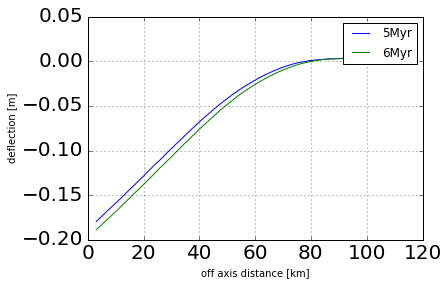

In [12]:
plt.grid()
plt.xlabel("off axis distance [km]")
plt.ylabel("deflection [m]")
plt.show()

In [13]:
len(list_data_dy)

8

In [14]:
xx = [item[2] for item in list_data_x]

In [15]:
# calculate the average x locations of the SDRs that is nearest to axis
xx_avg = sum(xx)/len(xx)*1000.
xx_avg

3419.0049767494202

In [16]:
dw0 = [item[2] for item in list_data_dy]

In [17]:
dw0 = np.array(dw0)

In [18]:
dw0*1000

array([ -87.74292755, -113.79164124, -155.34585571, -145.93875122,
       -178.57385254, -187.79360962, -179.55255127, -168.48373413], dtype=float32)

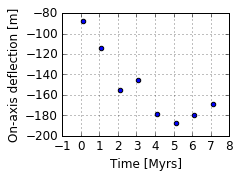

In [19]:
fig = plt.gcf()
fig.set_size_inches(3, 2.2)
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

plt.scatter(([0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1]), dw0*1000)
plt.grid()
plt.xlabel("Time [Myrs]", fontsize=12)
plt.ylabel("On-axis deflection [m]", fontsize=12)
plt.show()
fig.savefig(resources_path+'Newtonian_EVP-H20-axis.pdf', dpi=300)

In [20]:
# take the steady dw0 and calc the average (from 3)
N_steady = 4 # from the figure plot
dw0_avg = sum(dw0[N_steady:]) / len(dw0[N_steady:]) * 1000
dw0_avg

-178.60093712806702

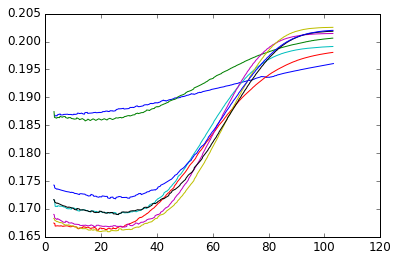

In [21]:
for i in range(N_SDR):
    plt.plot(list_data_x[i],list_data_dx[i])
plt.show()

In [22]:
int(Plate_thickness)*1000.

20000.0

In [23]:
# compare with analytic results
Hd = int(Plate_thickness)*1000.;              #[m] height of the dike
Te = int(Plate_thickness)*1000.;              #[m] effective plate thickness
g = 10.;                 #[m/s**2] gravitational acceleration
rho_d = 3000.;           #[kg/m**3] density of the solidified dike
rho_f = 2800.;           #[kg/m**3] density of the fluid dike
delta_rho_d = rho_d - rho_f;
rho_i_sedi = 2300.;
rho_i = 2800.;           #[kg/m**3] density of the infill
rho_c = 3000.;           #[kg/m**3] density of the underlying lower crust or mantle
sediment = 0;  # whether infill is sedi or lava  (1 means sedi)
if sediment == 1:
    delta_rho_c = rho_c - rho_i_sedi;
else:
    delta_rho_c = rho_c - rho_i;


E = 7.5 * 10.**10.;          #[Pa] Young's modulus; for lame constants of 30GPa
mu = 0.25;              # Poisson's ratio
D = (E * Te**3.) / (12 * (1 - mu**2.)); #[N*m] Flexural rigidity
alpha = (4. * D / (delta_rho_c * g))**0.25;#[m] Flexural wavelength
dx = dt_step / yr_in_Myr * 10. * 1000.  # [m] width of dike injection within one dt of 20kyr
dV_0 = dx * g * Hd * delta_rho_d; #[N/m] volcanic line load due to denser dike
dW_0 = 2 * dV_0 / (alpha * g * delta_rho_c)

In [24]:

dW_0

78.7195868506172

In [25]:
alpha

101626.54963092295

In [26]:
np.exp(-xx_avg / alpha)* np.cos(xx_avg / alpha)

0.96636964829467653

In [27]:
dw0_avg

-178.60093712806702

In [28]:
# # using scypy to solve
# import sympy as sp
# from sympy.solvers import solve
# from sympy import Symbol
# alpha_n = Symbol('alpha_n')
# eq = dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
#     * sp.exp(-xx_avg / alpha_n) * sp.cos(xx_avg / alpha_n)
# solve(eq, alpha_n)

In [29]:
dw0_avg

-178.60093712806702

In [30]:
xx_avg

3419.0049767494202

In [31]:
dV_0

8000000000.0

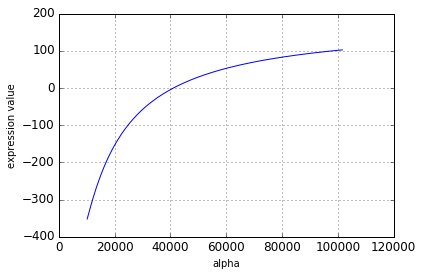

In [32]:
from scipy.optimize import fsolve
func = lambda alpha_n: \
        -dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
         * np.exp(-xx_avg / alpha_n) * np.cos(xx_avg / alpha_n)
#plot
# Plot it

alpha_n = np.linspace(alpha/10, alpha, 201)

plt.plot(alpha_n, func(alpha_n))
plt.xlabel("alpha")
plt.ylabel("expression value")
plt.grid()
plt.show()

alpha_n_initial_guess = alpha
alpha_n_solution = fsolve(func, alpha_n_initial_guess)

In [33]:
alpha_n_solution

array([ 41072.14874092])

In [34]:
Te_n = (alpha_n_solution / (E / (3*delta_rho_c*g*(1-mu**2)))**0.25)**(4/3.)

In [35]:
Te_n

array([ 5976.08803597])

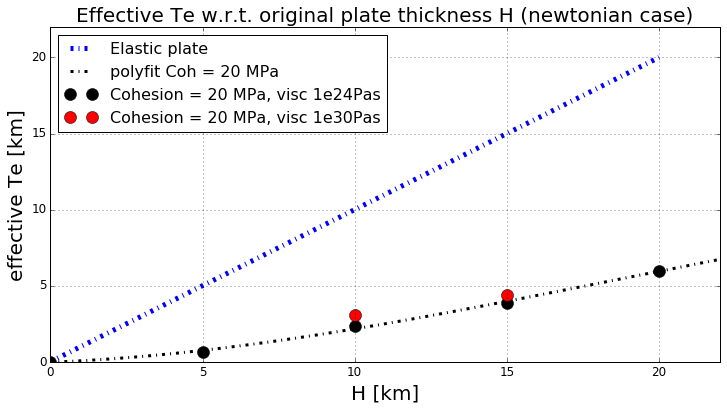

In [36]:
H = [0,5,10,15,20]
HH = [0,20]
Te = [0,0.641,2.325,3.866,5.976]

polyP = np.polyfit(H,Te,3)
polyP_func = np.poly1d(polyP)
xp = np.linspace(0,22,500)
Tep = polyP_func(xp)


fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'b-.',linewidth=5,label="Elastic plate")

plt.plot(xp,Tep,'k-.',linewidth=3,label="polyfit Coh = 20 MPa")
plt.plot(H,Te,'ko',markersize=12,label="Cohesion = 20 MPa, visc 1e24Pas" )

plt.plot(10,3.1,'ro',markersize=12,label="Cohesion = 20 MPa, visc 1e30Pas" )
plt.plot(15,4.416,'ro',markersize=12)
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.title("Effective Te w.r.t. original plate thickness H (newtonian case)",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("effective Te [km]",fontsize=20)
plt.grid()
plt.axis([0,22, 0, 22])
plt.legend(loc=2,fontsize=16)
plt.show()

fig.savefig(resources_path+'Newtonian_EVP-Te_H-$.pdf', dpi=300)

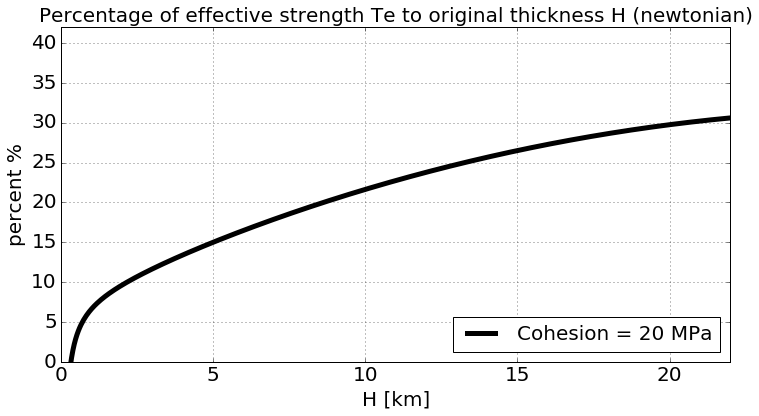

In [37]:
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.plot(xp[1:],Tep[1:]/xp[1:]*100,'k-',linewidth=5,label="Cohesion = 20 MPa")
#plt.plot(xp[1:],TepC[1:]/xp[1:]*100,'r-.',linewidth=5,label="Cohesion = 40 MPa")
plt.title("Percentage of effective strength Te to original thickness H (newtonian)",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("percent %",fontsize=20)
plt.grid()
plt.axis([0,22, 0, 42])
plt.legend(loc=4,fontsize=20)
plt.show()

fig.savefig(resources_path+'Newtonian_EVP-Te_H_percentage-$.pdf', dpi=300)

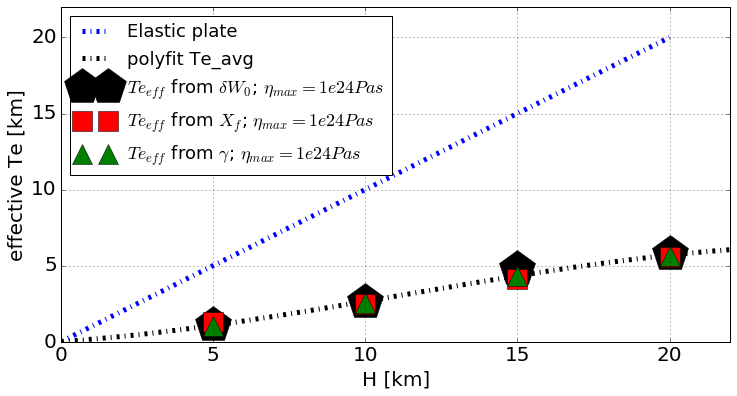

In [43]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

H = [0,5,10,15,20]
HH = [0,20]
Te = [0,1.09,2.63,4.77,5.8]
Te_xf = [0,1.28,2.5,4.1,5.57]
Te_gamma = [0,1.06,2.55,4.32,5.66]
Te_sum = [Te[i]+Te_xf[i]+Te_gamma[i] for i in range(len(Te))]
Te_avg = [x / 3.0 for x in Te_sum]


polyP = np.polyfit(H,Te_avg,3)
polyP_func = np.poly1d(polyP)
xp = np.linspace(0,22,500)
Tep = polyP_func(xp)

#y_test = polyP[0]*xp**3 + polyP[1]*xp**2 + polyP[2]*xp**1 + polyP[3]*xp**0

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'b-.',linewidth=5,label="Elastic plate")


plt.plot(xp,Tep,'k-.',linewidth=5,label="polyfit Te_avg")

#plt.plot(10,3.1,'bo',markersize=28,label="$Te_{eff}$ from $\delta W_0$; $\eta_{max} = 1e30 Pas$" )
#plt.plot(15,4.416,'bo',markersize=28)

#plt.plot(xp,y_test,'r-.',linewidth=6,label="polyfit Te_avg")
plot1,=plt.plot(H[1:],Te[1:],'kp',markersize=38,label="$Te_{eff}$ from $\delta W_0$; $\eta_{max} = 1e24 Pas$" )

plt.plot(H[1:],Te_xf[1:],'rs',markersize=20,label="$Te_{eff}$ from $X_f$; $\eta_{max} = 1e24 Pas$" )
plt.plot(H[1:],Te_gamma[1:],'g^',markersize=20,label="$Te_{eff}$ from $\gamma$; $\eta_{max} = 1e24 Pas$" )

import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

#plt.title("Effective Te w.r.t. original plate thickness H (newtonian case)",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("effective Te [km]",fontsize=20)
plt.grid()
plt.axis([0,22, 0, 22])
plt.legend(loc=2,fontsize=18)
plt.show()

fig.savefig(resources_path+'Newtonian_EVP-Te_H-$.pdf', dpi=300)

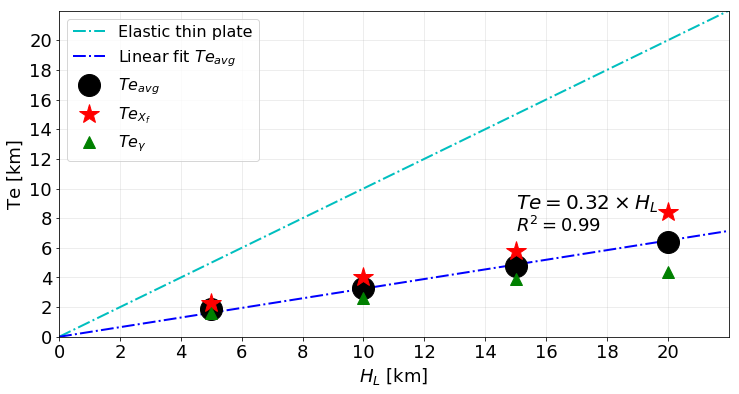

In [22]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt
resources_path="/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/"


H = [0,5,10,15,20]
HH = [0,22]
Te = [0,1.9,3.3,4.8,6.4]
Te_xf = [0,2.3,4.0,5.8,8.4]
Te_gamma = [0,1.6,2.6,3.9,4.4]
Te_sum = [Te[i]+Te_xf[i]+Te_gamma[i] for i in range(len(Te))]
#Te_avg = [x / 3.0 for x in Te_sum]
Te_avg = Te

polyP = np.polyfit(H,Te_avg,1)
polyP2 = ([0.3247, 0])
polyP_func = np.poly1d(polyP)
polyP_func2 = np.poly1d(polyP2)
xp = np.linspace(0,22,500)
Tep = polyP_func(xp)
Tep2 = polyP_func2(xp)
#y_test = polyP[0]*xp**3 + polyP[1]*xp**2 + polyP[2]*xp**1 + polyP[3]*xp**0

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'c-.',linewidth=2,label="Elastic thin plate")

plt.plot(xp,Tep2,'b-.',linewidth=2,label="Linear fit $Te_{avg}$")

#plt.plot(10,3.1,'bo',markersize=28,label="$Te_{eff}$ from $\delta W_0$; $\eta_{max} = 1e30 Pas$" )
#plt.plot(15,4.416,'bo',markersize=28)

#plt.plot(xp,y_test,'r-.',linewidth=6,label="polyfit Te_avg")
plot1,=plt.plot(H[1:],Te[1:],'ko',markersize=22,label="$Te_{avg}$" )

plt.plot(H[1:],Te_xf[1:],'r*',markersize=20,label="$Te_{X_f}$" )
plt.plot(H[1:],Te_gamma[1:],'g^',markersize=12,label="$Te_{\gamma}$" )

import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

plt.text(15,8.6, r'$Te = 0.32 \times H_{L}$', fontsize=20)
plt.text(15.,7.1, r'$R^{2} = 0.99$', fontsize=18)
plt.xticks(np.arange(min(H), 22, 2))
plt.yticks(np.arange(min(H), 22, 2))
#plt.title("Effective Te w.r.t. original plate thickness H (newtonian case)",fontsize=20)
plt.xlabel("$H_L$ [km]",fontsize=18)
plt.ylabel("Te [km]",fontsize=18)
plt.grid(alpha=0.28)
plt.axis([0,22, 0, 22])
plt.legend(loc=2,fontsize=16)
plt.show()

fig.savefig(resources_path+'Newtonian_EVP-Te_H-$.pdf', dpi=300)

In [3]:
Te

[0, 1.9, 3.3, 4.8, 6.4]

In [22]:
resources_path

'/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/'

In [65]:
polyP

array([ 0.37376325,  0.10503534])

In [44]:
Te_avg

[0.0,
 0.9936666666666666,
 2.4583333333333335,
 4.0953333333333335,
 5.735333333333333]